
KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data). We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df =sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
X=df.drop('species',axis=1)
y=df['species']

In [35]:
 #train test split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [36]:
# : import KNN and train the model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [37]:
# prompt: predict the model

predictions = knn.predict(X_test)
print(predictions)


['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor']


In [38]:
#  evaluate the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
1.0


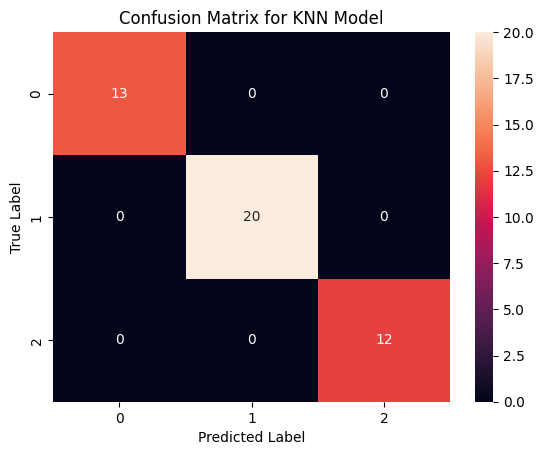

In [39]:
# plot the confusion matrix



# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")

# Display the heatmap
plt.show()


In [40]:
#  test the model with new values

# Test the model with new values
new_values = [[5, 2.9, 1, 0.2], [6.3, 3.3, 6, 2.5]]
predictions = knn.predict(new_values)

# Print the predictions
print(predictions)


['setosa' 'virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [59]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
X=tips.drop('tip',axis=1)
y=tips['tip']

In [61]:
# prompt: encode the categorical and objects columns using for loop and Label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in X.select_dtypes(include=['category', 'object']):
  X[column] = le.fit_transform(X[column])



In [62]:
#  train test split with 0.2 and call KNR
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [63]:


# Predict the tips with trained model
predictions = knn.predict(X_test)

# Print the predictions
print(predictions)


[2.33333333 3.19666667 2.16666667 3.48666667 4.26666667 2.20666667
 6.41       2.66666667 1.62666667 1.64       3.02       3.16666667
 1.64       2.         2.6        2.57333333 2.16666667 3.94666667
 1.93333333 2.99       2.75       4.80666667 3.91       2.52
 3.91       1.42       2.73       2.85       4.62666667 4.10333333
 4.74333333 4.69333333 2.23       6.41       3.28666667 2.42333333
 3.03333333 2.76333333 2.67666667 3.07666667 2.03666667 4.52666667
 4.92666667 5.19333333 2.66666667 1.91       3.77       5.55666667
 1.74333333]


In [64]:
# prompt: Evaluate the model

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean squared error:", mse)
print("Mean absolute error:", mae)


Mean squared error: 1.78679410430839
Mean absolute error: 0.9681632653061225


In [67]:
 # Modify the data to match the number of features expected by the model
new_values = [[30, 1, 0, 1, 2, 1], [40, 3, 1, 1, 2, 1]]

# Make predictions using the modified data
predictions = knn.predict(new_values)

# Print the predictions
print(predictions)

[3.88666667 5.10333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### Advantages of the KNN Algorithm
Easy to implement as the complexity of the algorithm is not that high.
Adapts Easily – As per the working of the KNN algorithm it stores all the data in memory storage and hence whenever a new example or data point is added then the algorithm adjusts itself as per that new example and has its contribution to the future predictions as well.
Few Hyperparameters – The only parameters which are required in the training of a KNN algorithm are the value of k and the choice of the distance metric which we would like to choose from our evaluation metric.

### Disadvantages of the KNN Algorithm
Does not scale – As we have heard about this that the KNN algorithm is also considered a Lazy Algorithm. The main significance of this term is that this takes lots of computing power as well as data storage. This makes this algorithm both time-consuming and resource exhausting.
Curse of Dimensionality – There is a term known as the peaking phenomenon according to this the KNN algorithm is affected by the curse of dimensionality which implies the algorithm faces a hard time classifying the data points properly when the dimensionality is too high.
Prone to Overfitting – As the algorithm is affected due to the curse of dimensionality it is prone to the problem of overfitting as well. Hence generally feature selection as well as dimensionality reduction techniques are applied to deal with this problem